# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

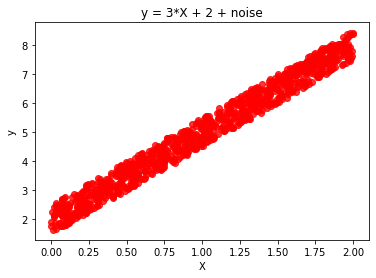

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 1000)
X = np.random.uniform(0, 2, 1000)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3*X + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta + \eta \cdot (y - \hat{y}) \cdot x\\
b & = b + \eta \cdot (y - \hat{y})
\end{align*}$

这种一次只取一个数据，然后更新 $\theta$ 和 $b$ 的做法叫做 Stochastic Graident Descent。好处就是实现起来比较简单，缺点呢就是收敛比较慢。

In [3]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

EPOCH = 100000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=1)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = sample_y - y_pred
    theta = theta + LEARNING_RATE * loss * sample_x
    b = b + LEARNING_RATE * loss

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 7.163227
EPOCH: 5000, loss: 1.905442
EPOCH: 10000, loss: 5.589278
EPOCH: 15000, loss: 3.133166
EPOCH: 20000, loss: 4.651692
EPOCH: 25000, loss: 2.268490
EPOCH: 30000, loss: 4.335404
EPOCH: 35000, loss: 1.956488
EPOCH: 40000, loss: 3.241476
EPOCH: 45000, loss: 3.181111
EPOCH: 50000, loss: 1.383710
EPOCH: 55000, loss: 1.706250
EPOCH: 60000, loss: 2.199995
EPOCH: 65000, loss: 0.432289
EPOCH: 70000, loss: 0.177798
EPOCH: 75000, loss: 1.413204
EPOCH: 80000, loss: 0.486306
EPOCH: 85000, loss: 0.592074
EPOCH: 90000, loss: 0.578313
EPOCH: 95000, loss: 0.736950
theta is 2.514274, b is 2.000106


# Batch Gradient Descent

Batch Gradient Descent 和 Stochastic Gradient Descent 的差别在于一次读取一批数据，然后使用这批数据的均值 Gradient，作为下降的参数，这个时候的 Stochastic Gradient Descent 就需要稍作修改，也即

$\begin{align*}
\theta & = \theta + \eta \cdot \frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i \\
b & = b + \eta \cdot \frac{1}{N} \sum_i(y_i - \hat{y_i})
\end{align*}$

一个批次的数据是 N，均值 Gradient 的计算即为 $\frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i$

In [4]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = sample_y - y_pred
    theta = theta + LEARNING_RATE * np.dot(loss, sample_x) / BATCH_SIZE
    b = b + LEARNING_RATE * np.sum(loss, 0) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 78.586124
EPOCH: 5000, loss: 69.763347
EPOCH: 10000, loss: 71.653812
EPOCH: 15000, loss: 56.481131
EPOCH: 20000, loss: 44.693842
EPOCH: 25000, loss: 42.874079
EPOCH: 30000, loss: 45.476461
EPOCH: 35000, loss: 40.417205
EPOCH: 40000, loss: 29.583826
EPOCH: 45000, loss: 33.158931
EPOCH: 50000, loss: 24.315034
EPOCH: 55000, loss: 24.158904
EPOCH: 60000, loss: 22.877241
EPOCH: 65000, loss: 20.808828
EPOCH: 70000, loss: 11.822577
EPOCH: 75000, loss: 14.806711
EPOCH: 80000, loss: 11.836043
EPOCH: 85000, loss: 9.437072
EPOCH: 90000, loss: 10.143903
EPOCH: 95000, loss: 10.314083
theta is 2.514411, b is 2.000344


In [ ]:
git config --global